In [ ]:
from zipfile import ZipFile

with ZipFile("/content/drive/MyDrive/Face Mask Dataset.zip","r") as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import numpy as np

from torchvision import utils
from torchvision import datasets, models, transforms
import os

In [ ]:
data_transforms = {
    "train" : transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
    "val" : transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ]),
}

In [ ]:
data_dir = "/content/Face Mask Dataset"

In [ ]:
image_dataset = {x: datasets.ImageFolder(os.path.join(data_dir,x),
                                        data_transforms[x])
                for x in ["train", "val"]}

In [ ]:
dataloaders = {x: torch.utils.data.DataLoader(image_dataset[x], batch_size=128,
                                              shuffle = True,num_workers = 2)
                            for x in ["train","val"]}


In [ ]:
len(dataloaders["train"])

85

In [ ]:
dataset_sizes = {x: len(image_dataset[x]) for x in ["train","val"]}
class_names = image_dataset["train"].classes

In [ ]:
class_names

['WithMask', 'WithoutMask']

In [ ]:
len(image_dataset["train"])

10800

In [ ]:
dataset_sizes["val"]

992

In [ ]:
class_names

['WithMask', 'WithoutMask']

In [ ]:
import torchvision
model=torchvision.models.mobilenet_v2(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [ ]:
for param in model.parameters():
    param.requires_grad=True

classifier = nn.Sequential(nn.Linear(1280,256),nn.ReLU(),nn.Dropout(0.25),nn.Linear(256,2),nn.Sigmoid())
model.fc = classifier

In [ ]:
model

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [ ]:
import torchvision
import matplotlib.pyplot as plt


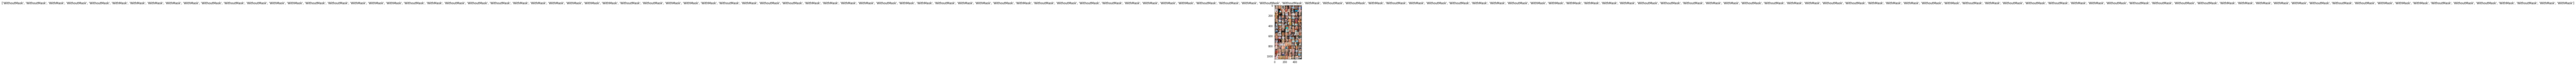

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(),lr = 0.001)

# Learning Rate Decay (Decay LR by factor of 0.1 every 7 epochs)

exp_lr_schedular = lr_scheduler.StepLR(optimizer,step_size=7,gamma=0.1)

In [ ]:

train_losses = []
validation_losses = []

for epoch in range(1,21):
    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for input,target in dataloaders["train"]:
        input = input.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    

    model.eval()
    for input,target in dataloaders["val"]:
        input = input.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output,target)

        valid_loss += loss.item()
    
    exp_lr_schedular.step()
    
    # calculate average losses
    train_loss = train_loss/len(dataloaders["train"])
    valid_loss = valid_loss/len(dataloaders["val"])
    train_losses.append(train_loss)
    validation_losses.append(valid_loss)

    print(f"Epoch {epoch}: \t Training Loss:  {train_loss} \t Validation Loss:  {valid_loss}")

Epoch 1: 	 Training Loss:  0.3870776497954359 	 Validation Loss:  0.018358408997301012
Epoch 2: 	 Training Loss:  0.009863512514429578 	 Validation Loss:  0.012783973807472648
Epoch 3: 	 Training Loss:  0.0034675099673085485 	 Validation Loss:  0.005279313236030703
Epoch 4: 	 Training Loss:  0.002583744850171436 	 Validation Loss:  0.005167421796159033
Epoch 5: 	 Training Loss:  0.0012738652634291558 	 Validation Loss:  0.008708521459766416
Epoch 6: 	 Training Loss:  0.0013966601858427072 	 Validation Loss:  0.006894304790421302
Epoch 7: 	 Training Loss:  0.0057723755799262266 	 Validation Loss:  0.006821403180680363
Epoch 8: 	 Training Loss:  0.000874689750405032 	 Validation Loss:  0.005847219582427954
Epoch 9: 	 Training Loss:  0.00041436084378223284 	 Validation Loss:  0.004509152889559331
Epoch 10: 	 Training Loss:  0.0003888321349728418 	 Validation Loss:  0.005121047520674438
Epoch 11: 	 Training Loss:  0.00042478732897171097 	 Validation Loss:  0.006846798090741402
Epoch 12: 	 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in dataloaders['val']:
        images, labels = data[0].to(device),data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the validation set is: {100*correct/total}%")

Accuracy of the network on the validation set is: 99.8991935483871%


In [ ]:
torch.save(model.state_dict(),"/content/face_mask_path.pth" )